<span style="font-size:12px">

Attention Mechanism — “집중의 기술”

---

## Seq2Seq의 한계 — 왜 Attention이 등장했는가?

### 개념 설명  
Seq2Seq(Sequence-to-Sequence) 모델은 “입력 문장을 인코더가 요약해서 벡터로 만든 뒤,  
디코더가 그 벡터를 이용해 출력 문장을 하나씩 만들어내는 구조”입니다.  
예: 영어 문장 “I love you”를 한국어로 번역한다면,  
인코더는 이 문장을 벡터 하나로 요약하고, 디코더는 “나는 너를 사랑해”를 단어별로 생성합니다.

### 왜 필요한가  
초기 Seq2Seq는 “고정된 하나의 벡터(=문장 전체 요약)”에 모든 정보를 담으려 했습니다.  
짧은 문장은 괜찮지만, 문장이 길어질수록 문제가 생깁니다.  
중간 내용이 ‘압축’ 과정에서 잃어버려지는 거죠.  
즉, **기억력이 짧은 번역가**처럼 앞부분 내용을 잊어버립니다.

###  어떻게 동작하는가 (한계점)  
- 인코더는 입력 문장을 끝까지 읽고, 그 결과를 하나의 벡터에 저장합니다.  
- 디코더는 이 벡터 하나만 보고 전체 번역을 수행합니다.  
결과적으로, **문장의 길이가 길면 정보 손실**이 발생합니다.  

###  비유  
학생이 긴 문장을 외워서 요약한 뒤 발표한다고 생각해보세요.  
10단어짜리 문장은 외울 수 있지만, 100단어짜리는 요약하다가 빠뜨립니다.  
Attention은 이 문제를 해결하기 위해 등장한 **‘집중 메커니즘’**입니다.  

###  핵심 요약  
Seq2Seq는 긴 문장에서 정보 손실이 생긴다 →  
Attention은 “필요할 때, 필요한 부분만 집중해서 보는 방법”을 제공한다.  

---

##  Attention의 기본 개념 — 중요한 정보에 집중하기

###  개념 설명  
Attention은 “모든 입력 단어를 다 보되, 현재 내가 예측하려는 단어와 **가장 관련 있는 부분**에 더 주목하는 방법”입니다.  
즉, 문장의 전체 맥락을 보면서도, 특정 순간에는 일부 단어에 집중합니다.

###  왜 필요한가  
디코더가 단어를 생성할 때,  
“이 단어를 예측할 때는 입력 문장의 어떤 단어가 가장 중요할까?”를 판단해야 합니다.  
예를 들어, “나는 사과를 먹는다” → “I eat an apple”을 번역할 때,  
‘사과’를 번역할 때는 ‘apple’에 집중해야 하고, ‘먹는다’를 번역할 때는 ‘eat’에 집중해야 하죠.

###  어떻게 동작하는가  
1. 디코더가 현재 단어를 예측하려고 할 때,  
2. 인코더의 모든 단어에 대해 “관련도 점수(score)”를 계산합니다.  
3. 이 점수를 **Softmax**를 통해 확률처럼 정규화합니다.  
4. 높은 점수를 받은 단어일수록 **더 크게 반영**합니다.  

###  비유  
학생이 시험 문제를 풀 때, 교과서 전체를 다 보는 대신  
“이 문제와 관련된 부분”만 집중해서 보는 것과 같습니다.  
Attention은 모델에게 **‘집중력’을 주는 기술**입니다.

###  핵심 요약  
Attention은 “모든 단어를 다 보지만, 중요한 단어에 가중치를 높이는 메커니즘”이다.  

---

##  Query, Key, Value의 역할 이해

###  개념 설명  
Attention은 세 가지 요소로 구성됩니다:  
- **Query(질문)**: “지금 내가 예측하려는 단어는 어떤 정보를 원할까?”  
- **Key(열쇠)**: “각 입력 단어가 가지고 있는 주제나 의미의 특징”  
- **Value(값)**: “그 단어가 실제로 가진 정보”  

###  왜 필요한가  
Query와 Key를 비교하면, 어떤 입력 단어가 지금 예측하려는 단어와 관련 있는지를 판단할 수 있습니다.  
즉, Query ↔ Key의 유사도를 계산하면 **집중할 대상**이 정해집니다.  
그 뒤 Value를 조합해 최종 문맥(Context)을 만듭니다.  

###  어떻게 동작하는가  
1. 디코더에서 Query 벡터를 만든다.  
2. 인코더의 각 단어에서 Key와 Value 벡터를 만든다.  
3. Query와 각 Key의 유사도를 계산해 점수를 매긴다.  
4. 점수를 Softmax로 변환하여 확률처럼 만든다.  
5. Value들을 이 확률로 가중합(weighted sum)하여 문맥(Context) 벡터를 만든다.

###  비유  
Query는 “지금 찾고 싶은 질문”,  
Key는 “책의 목차”,  
Value는 “책의 실제 내용”입니다.  
Query가 “사과란 무엇인가?”일 때, Key 중 ‘과일’과 관련된 부분이 높게 매칭되고,  
그 Value(‘사과는 달콤한 과일이다’)가 문맥으로 선택됩니다.

###  핵심 요약  
Query는 “무엇을 찾을지”, Key는 “무엇을 가지고 있는지”, Value는 “그 내용”이다.  

---

##  유사도 점수(Score) 계산과 Softmax의 의미

###  개념 설명  
Attention은 “Query와 Key가 얼마나 비슷한가?”를 점수로 계산합니다.  
이 점수가 높을수록 그 단어에 더 집중합니다.  
이때 Softmax는 점수를 0~1 사이의 **확률처럼 변환**해 전체 비중을 정리합니다.  

###  왜 필요한가  
모든 단어의 중요도를 수치로 표현하려면,  
전체 비중의 합이 1이 되도록 정규화해야 합니다.  
그래야 “가장 중요한 단어가 어디인지” 명확하게 알 수 있습니다.  

###  어떻게 동작하는가  
- Query와 Key의 유사도를 계산 → 점수(score)  
- Softmax를 적용 → 각 단어의 중요도를 확률처럼 변환  
- 높은 확률 = 높은 집중도  

###  비유  
학생이 교과서 내용을 훑으면서 “이 문제랑 관련된 문단이 어디 있지?” 하고  
각 문단에 0~1 사이의 집중도를 매긴다고 생각해보세요.  
“이 단락이 제일 중요해 (0.7), 저건 조금 덜 중요해 (0.2), 나머지는 거의 상관없어 (0.1)”  

###  핵심 요약  
유사도 점수는 “얼마나 관련 있는가”,  
Softmax는 “그 비중을 확률로 정리”하는 단계다.  

---

##  Attention으로 만들어지는 문맥(Context) 벡터

###  개념 설명  
문맥 벡터(Context vector)는  
모든 단어의 Value를 “집중 비율(Softmax 결과)”로 섞은 결과물입니다.  
즉, 디코더는 이 문맥 벡터를 이용해 **현재 단어를 예측**합니다.

###  왜 필요한가  
문맥 벡터는 “필요할 때마다 다시 계산되는 문장 요약”입니다.  
Seq2Seq는 단 하나의 고정 요약을 썼다면,  
Attention은 단어마다 다른 요약을 만들어냅니다.

###  어떻게 동작하는가  
각 단어의 Value × 중요도(Softmax score)를 곱하고,  
모두 더하면 현재 시점의 문맥 벡터가 됩니다.  
이 벡터는 디코더의 다음 단어 예측에 직접 사용됩니다.  

###  비유  
교사가 학생에게 “이 문장에 ‘먹는다’라는 말이 나올 때,  
앞부분의 ‘사과’와 ‘밥’을 중심으로 다시 문맥을 생각해봐”라고 알려주는 것과 같습니다.  
즉, 매 단어마다 **다른 시점의 요약본**이 만들어지는 셈이죠.

###  핵심 요약  
Attention은 “단어별로 새롭게 만들어지는 문맥 요약 벡터”를 제공한다.  

---

##  Attention이 들어간 Seq2Seq 구조

###  개념 설명  
Attention이 추가된 Seq2Seq는  
디코더가 매 시점마다 **인코더의 전체 단어를 다시 참고**할 수 있게 됩니다.  

###  왜 필요한가  
고정된 요약 벡터 하나로는 정보 손실이 크지만,  
Attention을 통해 “필요할 때마다 입력 전체를 다시 본다”고 하면  
긴 문장에서도 안정적인 번역이 가능합니다.

###  어떻게 동작하는가  
1. 인코더는 각 단어에 대한 Hidden state를 생성.  
2. 디코더는 매 단어 생성 시, 인코더의 Hidden state 전체와 Attention을 수행.  
3. 그 결과 얻은 Context 벡터와 함께 다음 단어를 예측.  

###  흐름 다이어그램
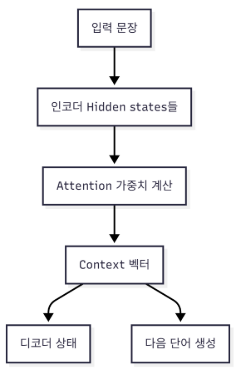


###  비유  
통역사가 한 번 듣고 끝내는 게 아니라,  
매 단어를 말할 때마다 다시 녹음한 내용을 돌려 들으면서 필요한 부분만 집중하는 것입니다.  

###  핵심 요약  
Attention이 추가된 Seq2Seq는 “디코더가 인코더 전체를 반복적으로 참고할 수 있는 구조”다.  

---

##  Self-Attention으로 확장된 Transformer와의 연결

###  개념 설명  
Transformer는 Attention을 더 확장해서  
**자기 자신(Self-Attention)**에게도 집중할 수 있게 만든 모델입니다.  
즉, 입력 문장 안의 단어들끼리 서로 관련성을 계산합니다.  

###  왜 필요한가  
“나는 오늘 아침에 사과를 먹었다”라는 문장에서  
‘먹었다’는 ‘사과’와 관련이 깊지만,  
RNN은 순서대로만 정보를 전달하므로 이 관계를 멀리서 보기 어렵습니다.  
Self-Attention은 문장 전체 단어들이 한 번에 서로를 바라볼 수 있게 합니다.  

###  어떻게 동작하는가  
문장 내의 각 단어가 Query, Key, Value를 모두 가지고,  
서로의 관련도를 계산해 새로운 표현을 만듭니다.  

###  비유  
회의 중 모든 참가자가 서로의 의견을 들으면서  
“누가 나와 가장 관련 있는 이야기 하는지” 판단해 자신의 생각을 조정하는 구조입니다.  

###  핵심 요약  
Self-Attention은 “문장 내부 단어들이 서로에게 주목할 수 있는 확장형 Attention”이다.  

---

##  실생활 응용과 요약

###  개념 설명  
Attention은 단순히 번역뿐 아니라  
요약, 질의응답, 감정 분석, 이미지 캡셔닝 등  
“입력의 특정 부분에 집중해야 하는 모든 문제”에서 쓰입니다.  

###  왜 필요한가  
인간의 집중 메커니즘을 모방해,  
모델이 **필요한 정보만 추출**하도록 돕기 때문입니다.  

###  비유  
뉴스 기사를 요약할 때,  
모든 문장을 다 읽지 않고 **핵심 문장에 집중**하는 것과 같습니다.  

###  핵심 요약  
Attention은 “AI에게 집중력을 부여하는 기술”이며,  
그 결과 Transformer와 같은 현대 NLP 모델의 핵심 기반이 되었다.  

---

## 전체 핵심 요약

- Seq2Seq는 하나의 벡터로 모든 정보를 담아 손실이 생김  
- Attention은 “필요할 때, 필요한 부분만 집중”하는 기술  
- Query–Key–Value 구조로 관련도를 계산  
- Softmax로 중요도를 정규화해 문맥 벡터 생성  
- Self-Attention은 문장 내부 단어끼리 상호 참조  
- Transformer는 이 구조를 기반으로 완성된 모델  

---



In [22]:
######## 실습1-1

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Concatenate, Dense, Lambda
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns



english_sentences = [
    'i love you',
    'he is a student',
    'she likes music',
    'we are learning attention',
    'you are amazing'
]

french_sentences = [
    '<start> je t aime <end>',
    '<start> il est etudiant <end>',
    '<start> elle aime la musique <end>',
    '<start> nous apprenons l attention <end>',
    '<start> tu es incroyable <end>'
]

In [23]:
######## 실습1-2
# Attention
    # 데이터
        #토큰화 : 문장을 단어 단위로 분리
        #특수토큰 : 디코더의 시작/종료 신호
        #패딩 : 길이 맞춤


# 토크나이저 생성
    # I'm fine. I'm fine? --> 문장의 느낌해석이 달라지므로.
    # 번역모델 (seq2seq, attention 포함)은 문장부호도 중요한 의미이기 때문에 제거하면 안됨.
    # filters='' ---> 제거할 문자가 없다. (fitlers='?!.,' 이렇게하면 제거하게됨)
eng_tokenizer = Tokenizer(filters='', oov_token='<OOV>')   
fra_tokenizer = Tokenizer(filters='', oov_token='<OOV>')   

eng_tokenizer.fit_on_texts(english_sentences)
fra_tokenizer.fit_on_texts(french_sentences)
# fra_tokenizer.index_word  # 단어에 인덱스 넣은것을 확인

# 시퀀스 변화
eng_sequence = eng_tokenizer.texts_to_sequences(english_sentences)
fra_sequence = fra_tokenizer.texts_to_sequences(french_sentences)

# 패딩
max_eng_len = max([ len(seq) for seq in eng_sequence])
max_fra_len = max([ len(seq) for seq in fra_sequence])
eng_padded = pad_sequences(eng_sequence, maxlen=max_eng_len)
fra_padded = pad_sequences(fra_sequence, maxlen=max_fra_len)
eng_vocab_size = len(eng_tokenizer.word_index) + 1  # keras의 tokenizer 인덱스를 1부터 부여
fra_vocab_size = len(fra_tokenizer.word_index) + 1 

print(f'영어 어휘 크기 : {eng_vocab_size}')
print(f'프랑스어 어휘 크기 : {fra_vocab_size}')
print(f'영어 최대 길이 : {max_eng_len}')
print(f'프랑스어 최대 길이 : {max_fra_len}')
print(f'영어 패딩: {eng_padded[0]}')
print(f'프랑스어 패딩 : {fra_padded[0]}')


영어 어휘 크기 : 17
프랑스어 어휘 크기 : 20
영어 최대 길이 : 4
프랑스어 최대 길이 : 6
영어 패딩: [0 4 5 2]
프랑스어 패딩 : [0 2 5 6 4 3]


In [24]:
######## 실습1-3
## Seq2Seq 기본 구조 (Encoder–Decoder–LSTM 기반)
# 인코더는 문맥(Context)을 요약해 전달하고,
# 디코더는 그 문맥과 이전 단어를 바탕으로 다음 단어를 생성한다.
    # Encoder : 입력 문장을 순차적으로 처리하며 의미를 요약 (Context 생성)
    #           마지막 hidden state와 cell state를 디코더의 초기 상태로 전달
    #
    # Decoder : 인코더로부터 전달받은 초기 상태(context)와
    #           이전 시점의 출력을 입력으로 받아 다음 단어를 예측
    #
    # return_sequences = True : 모든 타임스텝의 hidden state를 반환 (Attention 계산용)
    #
    # encoder_outputs : 인코더의 각 타임스텝 hidden state들 (Attention의 Key와 Value로 사용)
    # encoder_states  : 인코더의 마지막 hidden state와 cell state (디코더의 초기 상태로 사용)



# Funtional API 방식 
# 하이퍼파라미터
embedding_dim = 64
units = 128

# ========== ENCODER ==========
encoder_inputs = Input(shape=(max_eng_len,), name='encoder_input')
encoder_embedding = Embedding(eng_vocab_size, embedding_dim, name='encoder_embedding')(encoder_inputs)

# return_sequences=True: 모든 타임스텝의 hidden state 반환 (Attention 계산에 필요)
# return_state=True: 마지막 hidden state와 cell state 반환 (Decoder 초기화에 사용)
encoder_lstm = LSTM(units, return_sequences=True, return_state=True, name='encoder_lstm')
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# encoder_states = [state_h, state_c]는 Decoder의 초기 상태로 전달
encoder_states = [state_h, state_c]

print(f"✅ Encoder 구성 완료")
print(f"   - Encoder Outputs Shape: (batch, {max_eng_len}, {units})")
print(f"   - Hidden State Shape: (batch, {units})")
print(f"   - Cell State Shape: (batch, {units})")



# ========== DECODER ==========
max_decoder_len = max_fra_len - 1
decoder_inputs = Input(shape=(max_decoder_len,), name='decoder_input')
decoder_embedding = Embedding(fra_vocab_size, embedding_dim, name='decoder_embedding')(decoder_inputs)

# return_sequences=True: 모든 타임스텝 출력 (각 시점마다 Attention 적용)
# return_state=True: Inference 시 상태 전달용
decoder_lstm = LSTM(units, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

print(f"✅ Decoder 구성 완료")
print(f"   - Decoder Outputs Shape: (batch, {max_fra_len}, {units})")

✅ Encoder 구성 완료
   - Encoder Outputs Shape: (batch, 4, 128)
   - Hidden State Shape: (batch, 128)
   - Cell State Shape: (batch, 128)
✅ Decoder 구성 완료
   - Decoder Outputs Shape: (batch, 6, 128)


In [25]:
######## 실습1-3 attention layer 구현
from tensorflow.keras.layers import Layer
# 디코더의 현재상태 (query)와 인코더의 모든 hidden state (keys/value)를 비교해서
# 각 인코더 타임스텝에 대한 중요도 (가중치)를 계산하고, 
# 그 가중치로 인코더 출력을 가중합해서 context vector를 얻는다

class CAttention(Layer):
    def __init__ (self, units, **kwargs):
        super(CAttention,self).__init__(**kwargs)
        self.units = units # 어텐션 내부에서 사용하는 차원
    def build(self, input_shape):
        # W1: Query 변환 가중치 (decoder hidden state → attention space)
        self.W1 = self.add_weight(name='W1',
                                   shape=(input_shape[0][-1], self.units), # input_shape[0] Query.shape / input_shape[1] keys,value / input_shape[1]??? 
                                   initializer='glorot_uniform',
                                   trainable=True)
        
        # W2: Key 변환 가중치 (encoder hidden states → attention space)
        self.W2 = self.add_weight(name='W2',
                                   shape=(input_shape[1][-1], self.units),
                                   initializer='glorot_uniform',
                                   trainable=True)
        
        # V: Score를 스칼라로 변환
        self.V = self.add_weight(name='V',
                                  shape=(self.units, 1),
                                  initializer='glorot_uniform',
                                  trainable=True)
        super(CAttention, self).build(input_shape)
        
    def call(self, inputs):
        """
        Args:
            query: Decoder hidden state (batch, decoder_units)
            values: Encoder hidden states (batch, max_eng_len, encoder_units)
        
        Returns:
            context_vector: (batch, encoder_units)
            attention_weights: (batch, max_eng_len, 1)
        """
        query, values = inputs
        
        # Query 차원 확장: (batch, decoder_units) → (batch, 1, decoder_units)
        query_with_time_axis = tf.expand_dims(query, 1)
        
        # Score 계산: tanh(W1*Q + W2*K)
        # W1*Q: (batch, 1, units)
        # W2*K: (batch, max_eng_len, units)
        score = tf.nn.tanh(
            tf.matmul(query_with_time_axis, self.W1) + tf.matmul(values, self.W2)
        )
        # score shape: (batch, max_eng_len, units)
        
        # V를 곱해서 스칼라 score로 변환
        attention_logits = tf.matmul(score, self.V)
        # shape: (batch, max_eng_len, 1)
        
        # Softmax로 확률 분포 변환 (합이 1)
        attention_weights = tf.nn.softmax(attention_logits, axis=1)
        
        # Context vector 계산: 가중 합
        # attention_weights: (batch, max_eng_len, 1)
        # values: (batch, max_eng_len, encoder_units)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        # shape: (batch, encoder_units)
        
        return context_vector, attention_weights
    
    def get_config(self):
        config = super().get_config()
        config.update({"units": self.units})
        return config


In [26]:
######## 실습1-4 attention layer 완성
# Attention Layer
attention_layer = CAttention(units=10, name='attention')
attention_layer

<CAttention name=attention, built=False>

In [27]:
######## 실습1-5 attention 통합모델
# Attention 통합모델
    # decoder에 Attention을 적용해서 Context Vector와 결합
    # 각 디코더 타임스텝마다 Attention 계산
    # TimeDistributed: 모든 타임스텝에 동일한 Dense Layer 적용

    # Lambda 레이어로 각 타입스템의 hidden state 추출 후 Attention 적용


# Attention을 각 디코더 타임스텝에 적용
def apply_attention(inputs):
    """
    각 타임스텝마다 Attention 계산
    """
    encoder_outputs, decoder_outputs = inputs
    
    # 타임스텝별로 순회하며 Context Vector 생성
    context_vectors = []
    attention_weights_list = []
    
    for t in range(max_decoder_len):
        # t 시점의 decoder hidden state 추출
        decoder_hidden_t = decoder_outputs[:, t, :]
        
        # Attention 계산
        context_vector, attention_weights = attention_layer([decoder_hidden_t, encoder_outputs])
        context_vectors.append(context_vector)
        attention_weights_list.append(attention_weights)
    
    # (batch, max_fra_len, encoder_units)로 재구성
    context_vectors = tf.stack(context_vectors, axis=1)
    attention_weights_all = tf.stack(attention_weights_list, axis=1)
    
    return context_vectors, attention_weights_all

# Lambda Layer로 래핑
attention_result = Lambda(apply_attention, name='apply_attention')([encoder_outputs, decoder_outputs])
context_vectors, attention_weights_all = attention_result[0], attention_result[1]  # Lambda에서 context_vectors만 반환

# Decoder Output + Context Vector 결합
decoder_combined = Concatenate(axis=-1, name='concat')([decoder_outputs, context_vectors])

# 최종 출력 레이어 (단어 확률 분포)
output_layer = Dense(fra_vocab_size, activation='softmax', name='output')
outputs = output_layer(decoder_combined)


print(f"   - Context Vector Shape: (batch, {max_fra_len}, {units})")
print(f"   - Combined Shape: (batch, {max_fra_len}, {units * 2})")
print(f"   - Output Shape: (batch, {max_fra_len}, {fra_vocab_size})")

   - Context Vector Shape: (batch, 6, 128)
   - Combined Shape: (batch, 6, 256)
   - Output Shape: (batch, 6, 20)


In [28]:
######## 실습1-6 모델 생성
model = Model([encoder_inputs, decoder_inputs], outputs, name='attention_seq2seq')
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)
model.summary()


Model: "attention_seq2seq"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_input       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_embedding   │ (None, 4, 64)     │      1,088 │ encoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_embedding   │ (None, 5, 64)     │      1,280 │ decoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, 4, 128),  │     98,816 │ encoder_embeddin… │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ [(None, 5, 128),  │     98,816 │ decoder_embeddin… │
│                     │ (None, 128),      │            │ encoder_lstm[0][… │
│                     │ (None, 128)]      │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ apply_attention     │ [(None, 5, 128),  │          0 │ encoder_lstm[0][… │
│ (Lambda)            │ (None, 5, 4, 1)]  │            │ decoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat              │ (None, 5, 256)    │          0 │ decoder_lstm[0][… │
│ (Concatenate)       │                   │            │ apply_attention[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 5, 20)     │      5,140 │ concat[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,140 (801.33 KB)

 Trainable params: 205,140 (801.33 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
######## 실습1-7 학습

# 학습데이터 준비 (Teacher Forcing)
decoder_input_data = fra_padded[ : , : -1]  # <start> + 문장 --> (마지막 토큰 제외)
decoder_target_data = fra_padded[ : , 1 : ]  # 문장 + <end>  --> (첫 토큰 제외)
print(f'encoder input : {eng_padded.shape}')
print(f'decoder input : {decoder_input_data.shape}')
print(f'decoder target : {decoder_target_data.shape}')

# 학습실행
history = model.fit(
    [eng_padded, decoder_input_data],
    np.expand_dims(decoder_target_data, -1),
    batch_size=2,
    epochs=1000,
    verbose=20
)

print(f"loss : {history.history['loss'][-1]}")
print(f"accuracy : {history.history['acc'][-1]}")

encoder input : (5, 4)
decoder input : (5, 5)
decoder target : (5, 5)
Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
E

In [30]:
def translate(input_sentence):
    """
    영어 문장을 프랑스어로 번역
    """
    # 입력 문장 전처리
    input_seq = eng_tokenizer.texts_to_sequences([input_sentence])
    input_seq = pad_sequences(input_seq, maxlen=max_eng_len, padding='post')
    
    # 디코더 입력 초기화 (<start> 토큰)
    start_token_id = fra_tokenizer.word_index['<start>']
    end_token_id = fra_tokenizer.word_index['<end>']
    
    # 디코더 입력: <start> + 패딩
    decoder_input = np.zeros((1, max_decoder_len))
    decoder_input[0, 0] = start_token_id
    
    # 번역 생성
    output_sentence = []
    
    for t in range(1, max_decoder_len):
        # 예측
        predictions = model.predict([input_seq, decoder_input], verbose=0)
        
        # t-1 시점의 예측 결과에서 가장 높은 확률의 단어 선택
        predicted_id = np.argmax(predictions[0, t-1, :])
        
        # <end> 토큰이면 종료
        if predicted_id == end_token_id:
            break
        
        # 단어 추가
        predicted_word = fra_tokenizer.index_word.get(predicted_id, '')
        if predicted_word not in ['<start>', '<end>', '']:
            output_sentence.append(predicted_word)
        
        # 다음 입력으로 사용
        decoder_input[0, t] = predicted_id
    
    return ' '.join(output_sentence)

# 테스트
print("\n번역 결과:\n")
for i in range(len(english_sentences)):
    translation = translate(english_sentences[i])
    print(f"영어: {english_sentences[i]}")
    print(f"원본: {french_sentences[i]}")
    print(f"번역: {translation}")
    print("-" * 40)

# for eng_sent in english_sentences:
#     translation = translate(eng_sent)
#     print(f"영어: {eng_sent}")
#     print(f"번역: {translation}")
#     print("-" * 40)


번역 결과:

영어: i love you
원본: <start> je t aime <end>
번역: je t aime
----------------------------------------
영어: he is a student
원본: <start> il est etudiant <end>
번역: il est etudiant
----------------------------------------
영어: she likes music
원본: <start> elle aime la musique <end>
번역: elle aime la musique
----------------------------------------
영어: we are learning attention
원본: <start> nous apprenons l attention <end>
번역: nous apprenons l attention
----------------------------------------
영어: you are amazing
원본: <start> tu es incroyable <end>
번역: tu es incroyable
----------------------------------------
